<h1 style = "text-align: center">Data Viz Experiment 2: Interactive plot</h1>

In the previous experiment (which you can find <a href = 'http://nbviewer.jupyter.org/github/alexlo94/AlexandrosLotsos_DATAVIZ/blob/master/Directory%20of%20Eateries_NYCOpenData/9-28-2017_Data%20Viz%20Experiment%201_NYC%20Eateries.ipynb'>here</a>) we used a dataset from <a href = 'https://data.cityofnewyork.us/'>NYC Open Data</a> which was titled <a href = 'https://data.cityofnewyork.us/Recreation/Directory-of-Eateries/8792-ebcp'>"Directory of Eateries"</a>.

Just like before, the data is stored in JSON format and the main attributes of the set we will be examining are the <em>name</em> and <em>category</em> of each institution. To expand on the previous experiment we will be using <a>seaborn</a> to produce static visualizations and <a>plotly</a> to produce interactive visualizations.

In [2]:
#first let's import neccessary packages
#running this cell will make the packages available for the entire notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.plotly as py
import plotly.graph_objs as go #plotly packages!

#the following command will enable inline plotting in our notebook
%matplotlib inline

Similar to the previous experiment, our goal for the rest of the document is to accomplish the following:
<ol>
    <li>Access the JSON to read the data</li>
    <li>Create a dataframe from the data that seaborn and plotly will be able to use</li>
    <li>Produce a complete, <b>static visualization</b> with <em>seaborn</em></li>
    <li>Produce a complete, <b>interactive visualization</b> with <em>plotly</em></li>
</ol>

In [3]:
#step 1 and 2: read the data and create a dataframe!
import json

#open the file and store all the contents in a list
with open('DPR_Eateries_001.json', 'r') as file:
    eat_list = json.load(file)
    
#create a dataframe from the list using pandas
eat_dframe = pd.DataFrame(eat_list)

#clean up the duplicates from the dataframe
#we have defined subset as name because food carts often appear as duplicates based on their different locations in NYC
clean_dframe = eat_dframe.drop_duplicates(subset = 'name')

#we now have a clean dataframe that we can use to make visualizations
print(clean_dframe)

                                           description    end_date  \
0                                                 None  2018-12-31   
13                                                None  2020-12-31   
14                                                None  2017-12-31   
17                                                None  2013-12-31   
18                                                None  2017-12-31   
19                                                None  2013-12-31   
20                                                None  2017-12-31   
27                                                None  2017-12-31   
28                                                None  2017-12-31   
29                                                None  2018-12-31   
30                                                None  2018-12-31   
31                                                None  2018-12-31   
33                                                None  2014-12-31   
34                  

Before we move on, it might be useful to extract some data from this dataframe and keep it aside for later use.
Namely, we will be extracting:
<ul>
    <li>The total number of eateries recorded in the dataset</li>
    <li>The number and names of eatery categories in the dataset</li>
    <li>The total number of eateries in each category</li>
</ul>

In [4]:
#record the number of unique eateries in the dataset
no_eateries = len(clean_dframe.index)
print("Our dataset has " + str(no_eateries) + " unique eateries recorded")

print()#newline for formatting

#access the type_name column of our dataframe to get the unique categories represented
categories = clean_dframe.type_name.unique()
print("There are " + str(len(categories)) + " categories in our dataset and they are:")
for category in categories:
    print("\"" + category + "\"")
    
print()#newline for formatting

#use the value_counts() method on our dataframe to count out the frequency of each category!
category_frequency = clean_dframe['type_name'].value_counts()
print("The frequencies in our dataset are as follows: ")
print(category_frequency)
category_frequency = category_frequency.to_dict()#switch the pandas series to a dict for computing purposes

Our dataset has 194 unique eateries recorded

There are 6 categories in our dataset and they are:
"Food Cart"
"Mobile Food Truck"
"Restaurant"
"Snack Bar"
"Specialty Cart"
"Fruit & Vegetable Cart"

The frequencies in our dataset are as follows: 
Mobile Food Truck         94
Food Cart                 45
Snack Bar                 24
Restaurant                14
Specialty Cart            13
Fruit & Vegetable Cart     4
Name: type_name, dtype: int64


Great! Now we can begin creating our plots. To recap:
<ul>
    <li>There are 194 unique eateries recorded</li>
    <li>There are 6 categories: <b>Food cart, Mobile Food Truck, Restaurant, Snack Bar, Specialty Cart and Fruit & Vegetable cart</b></li>
    <li>The most popular category of eatery is the mobile food truck, with 94 unique entries and the least is the fruit and vegetable cart with only 4 entries</li>
</ul>

<h2 style = " text-align: center">Now to create a complete, static visualization with seaborn!</h2>

In [5]:
#specify the settings of the bargraph
sb.set_context("talk")#make the graph more legible
sb.set_style("dark")
sb_dframe = clean_dframe[['name', 'type_name']]
sb_dframe.columns = ['Name', 'Category']

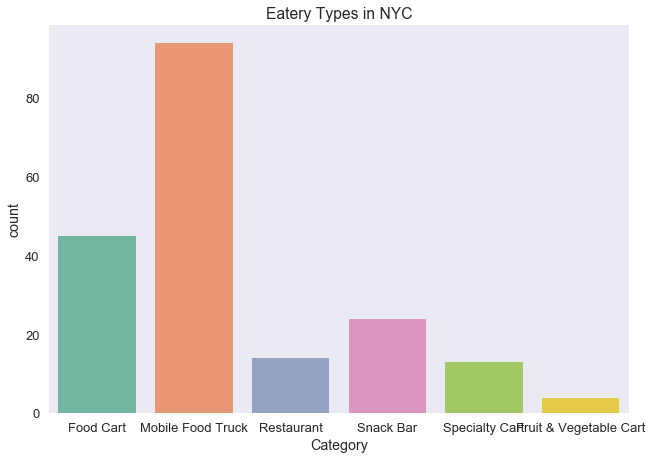

In [6]:
sb.plt.title('Eatery Types in NYC')
ax = sb.countplot(x = 'Category', data = sb_dframe, palette = 'Set2', orient = 'v')   #Vertical plot

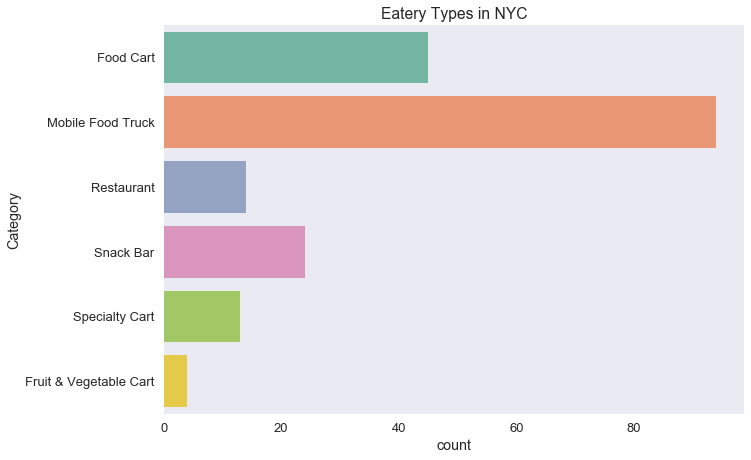

In [7]:
sb.plt.title('Eatery Types in NYC')
ax2 = sb.countplot(y = 'Category', data = sb_dframe, palette = 'Set2', orient = 'v') #horizontal plot

Simple, short and to the point. However, Seaborn does not give us options to make our plots interactive. If a viewer would like to see another form of representation of the data, or tweak some of the parameters, they're out of luck unless it's explicitly included. Here's where plotly comes in!

<h2 style = " text-align: center">Basic visualization in plotly!</h2>

In [8]:
#each plotly visualization starts with a "trace" let's have plotly produce the bargraph we made earlier
trace_bar = go.Bar(x = list(category_frequency.keys()), y = list(category_frequency.values()), name = 'NYC Eateries')
#a trace is a base for a layout, which specifies different labels for the figure
layout = go.Layout(title = 'Eatery Types in NYC: Bar Graph')
#We then combine a trace and layout to form a figure!
fig = go.Figure(data = [trace_bar], layout = layout)

py.iplot(fig, filename = 'bar-eatery')

In [9]:
#now let's try a pie chart in the same way
trace_pie = go.Pie(labels = list(category_frequency.keys()), values = list(category_frequency.values()), hoverinfo = 'label+value', textinfo = 'percent+label')
layout = go.Layout(title = 'Eatery Types in NYC: Pie Chart')
fig = go.Figure(data = [trace_pie], layout = layout)

py.iplot(fig, filename = 'pie-eatery')

<h2 style = " text-align: center">Adding Interactivity: Switching Between Layouts</h2>

In [25]:
trace_bar = go.Bar(x = list(category_frequency.keys()), y = list(category_frequency.values()), name = 'NYC Eateries', visible = True)
trace_pie = go.Pie(labels = list(category_frequency.keys()), values = list(category_frequency.values()), hoverinfo = 'label+value', textinfo = 'percent+label', visible = False)
#first let's compile the two traces we made before into an array
traces = [trace_bar, trace_pie]

#now let's define the GUI
updatemenus = list([
    dict(type = 'buttons',
        active = -1,
        buttons = list([
            dict(label = 'Bar',
                method = 'update',
                args = [{'visible' : [True, False]},
                       {'title' : 'Eatery Types in NYC: Bar Graph',
                       'xaxis': {'visible' : True},
                       'yaxis': {'visible' : True}}]),
            dict(label = 'Pie',
                method = 'update',
                args = [{'visible' : [False, True]},
                       {'title' : 'Eatery Types in NYC: Pie Chart',
                       'xaxis':{'visible' : False},
                       'yaxis':{'visible' : False}}])
        ])
    )
])


layout = dict(title = 'Eatery Types in NYC: Bar Graph', updatemenus = updatemenus)
fig = dict(data = traces, layout = layout)
py.iplot(fig, filename = 'Eatery Types in NYC: Interactive')